# Part 3

1.Generate 50 2D-data points using the following function:  . Add Gaussian random noise to the data. Show the original curve line and the noisy data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import random as rm

In [2]:
def f(x):
    return np.sin(x**2+1)

def data_generater(f,x_start,x_stop,num):
    g_m=0
    g_v=0.4
    x = np.linspace(x_start,x_stop,num)
    y = f(x) + np.random.normal(g_m,g_v,size=num)

    x_tr = np.linspace(x_start,x_stop,num*100)
    y_tr = f(x_tr)
    return x,y,x_tr,y_tr

In [3]:
[x,y,x_tr,y_tr]=data_generater(f,0,2,50)

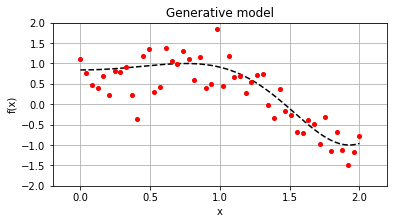

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'or', ms=4)
ax.set_xlim(-0.2, 2.2)
ax.set_ylim(-2, 2)
ax.set_title('Generative model')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()

2.Compute w based on the full Bayesian inference (by using basis functions like discussed in class). Display the estimated values of w.

In [5]:
def gaussian(x,xm,s):
    return np.exp((-1*(x-xm)**2)/(2*s*s))

def Full_fit(x,y,M,S,alpha,beta):
    N=len(x)
    X=np.zeros([N,M])
    vy=np.zeros([N,1])
    
    for n in range(0,N):
        mu=0
        for m in range(0,M):
            mu+=S
            X[n,m]=gaussian(x[n],mu,S)
        vy[n,0]=y[n]
        
    XX=np.dot(X.T,X)
    X_1=XX+alpha*np.eye(M)/beta
    iX_1=linalg.inv(X_1)
    w=np.dot(iX_1,np.dot(X.T,y))
    return w

def Full_plot(x,w):
    M=len(w)
    N=len(x)
    X=np.zeros([N,M])
    
    for n in range(0,N):
        mu=0
        for m in range(0,M):
            mu+=S
            X[n,m]=gaussian(x[n],mu,S)
    
    y=np.dot(X,w)
    return x,y
    

In [6]:
M=3
S=1
alpha=1
beta=0.4
w = Full_fit(x,y,M,S,alpha,beta)
print("W：\n",w)

W：
 [ 1.03194588 -0.75987571 -0.79821587]


3.Experiment with your code by changing alpha and beta. Discuss the meaning of them with respect to the curve fitting results.

M=3 S=1.000000 alpha=1.000000 beta=0.400000


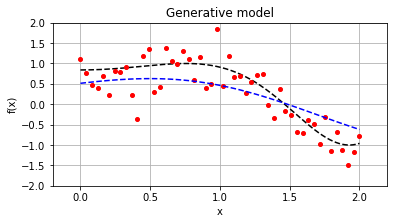

In [7]:
def figure_plot(x,y,x_tr,y_tr,x_ts,y_ts):
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    ax.plot(x_tr, y_tr, '--k')
    ax.plot(x, y, 'or', ms=4)
    ax.plot(x_ts, y_ts,'--b')
    ax.set_xlim(-0.2, 2.2)
    ax.set_ylim(-2, 2)
    ax.set_title('Generative model')
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
    
[x_ts,y_ts]=Full_plot(x,w)
print("M=%d"%M+" S=%f"%S+" alpha=%f"%alpha+" beta=%f"%beta)
figure_plot(x,y,x_tr,y_tr,x_ts,y_ts)

M=3 S=1.000000 alpha=3.000000 beta=0.400000


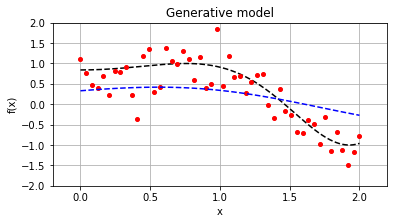

In [8]:
M=3
S=1
alpha=3
beta=0.4
w = Full_fit(x,y,M,S,alpha,beta)
[x_ts,y_ts]=Full_plot(x,w)
print("M=%d"%M+" S=%f"%S+" alpha=%f"%alpha+" beta=%f"%beta)
figure_plot(x,y,x_tr,y_tr,x_ts,y_ts)

M=3 S=1.000000 alpha=3.000000 beta=4.000000


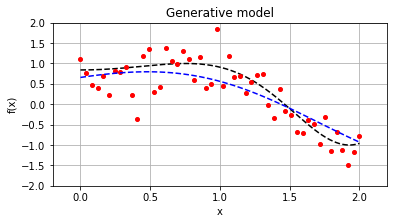

In [9]:
M=3
S=1
alpha=3
beta=4
w = Full_fit(x,y,M,S,alpha,beta)
[x_ts,y_ts]=Full_plot(x,w)
print("M=%d"%M+" S=%f"%S+" alpha=%f"%alpha+" beta=%f"%beta)
figure_plot(x,y,x_tr,y_tr,x_ts,y_ts)

M=3 S=1.000000 alpha=1.000000 beta=4.000000


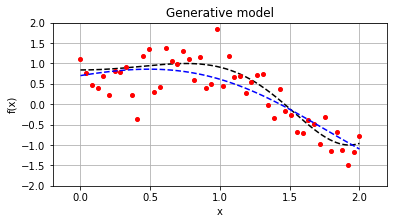

In [10]:
M=3
S=1
alpha=1
beta=4
w = Full_fit(x,y,M,S,alpha,beta)
[x_ts,y_ts]=Full_plot(x,w)
print("M=%d"%M+" S=%f"%S+" alpha=%f"%alpha+" beta=%f"%beta)
figure_plot(x,y,x_tr,y_tr,x_ts,y_ts)

4.Show your best fitting:

M=5 S=0.500000 alpha=0.500000 beta=0.400000


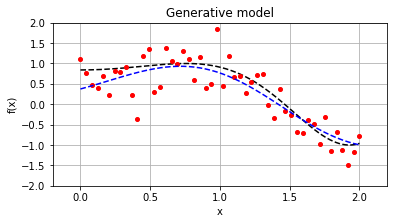

In [11]:
M=5
S=0.5
alpha=0.5
beta=0.4
w = Full_fit(x,y,M,S,alpha,beta)
[x_ts,y_ts]=Full_plot(x,w)
print("M=%d"%M+" S=%f"%S+" alpha=%f"%alpha+" beta=%f"%beta)
figure_plot(x,y,x_tr,y_tr,x_ts,y_ts)

### 5.Explain how useful p(w|t) for the training and testing stages.

It gives the precentage of credibility of one point in training and testing. In training, we can use it score the regression line. While in testing, we can konw how sure we are about the prediction.

In [12]:
def variance(x,Sn,S,M):
    X=np.zeros(M)
    mu=0
    for m in range(0,M):
        mu+=S
        X[m]=gaussian(x,mu,S)
    return 1/beta+np.dot(np.dot(X,Sn),X.T)
    

cycling 1 times
[8]


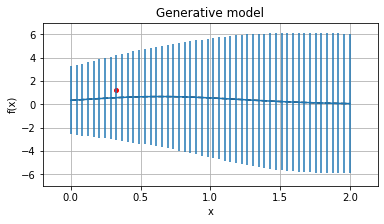

cycling 2 times
[8, 38]


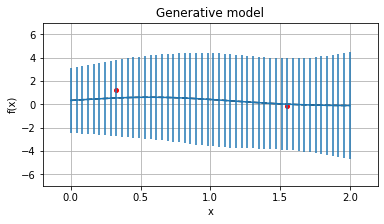

cycling 3 times
[8, 38, 41]


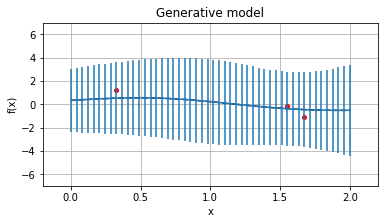

cycling 4 times
[8, 38, 41, 36]


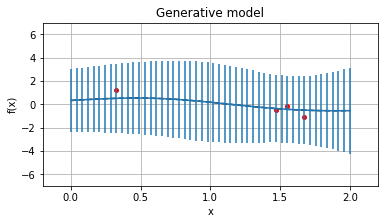

cycling 5 times
[8, 38, 41, 36, 10]


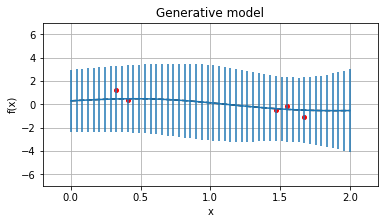

cycling 6 times
[8, 38, 41, 36, 10, 33]


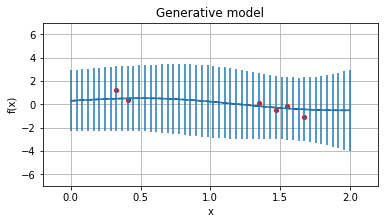

cycling 7 times
[8, 38, 41, 36, 10, 33, 41]


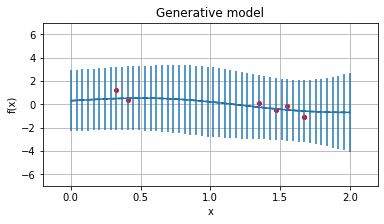

cycling 8 times
[8, 38, 41, 36, 10, 33, 41, 47]


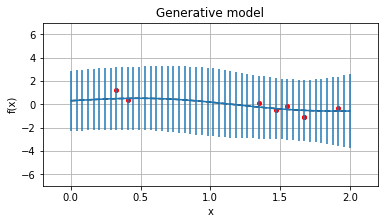

cycling 9 times
[8, 38, 41, 36, 10, 33, 41, 47, 1]


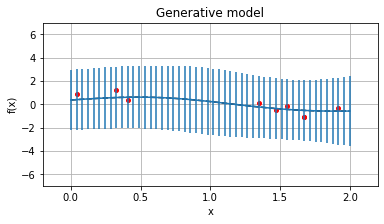

cycling 10 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38]


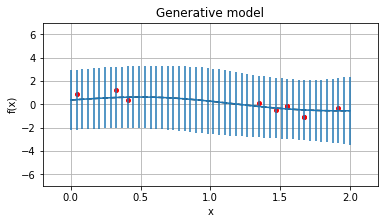

cycling 11 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41]


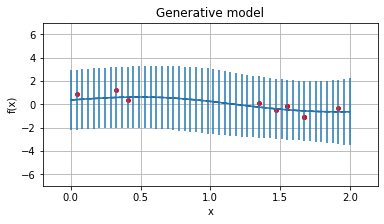

cycling 12 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44]


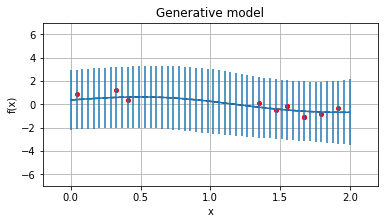

cycling 13 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40]


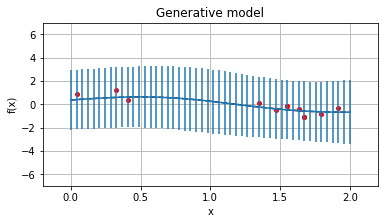

cycling 14 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0]


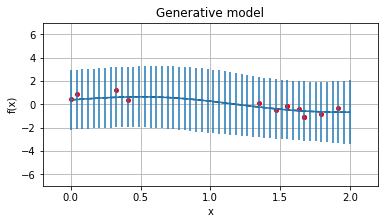

cycling 15 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19]


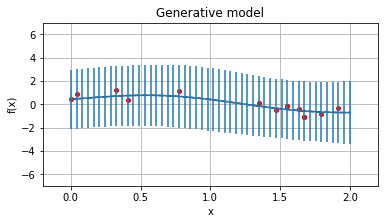

cycling 16 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48]


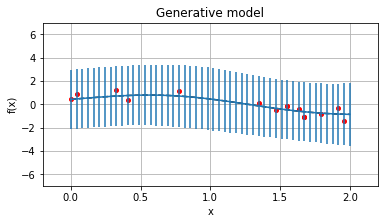

cycling 17 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31]


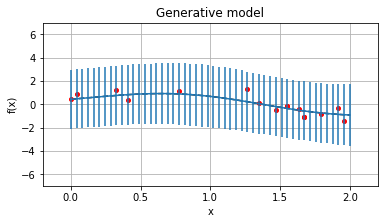

cycling 18 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42]


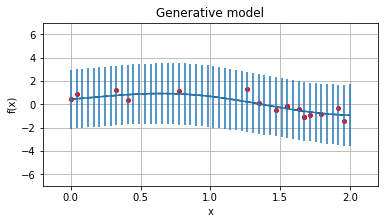

cycling 19 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29]


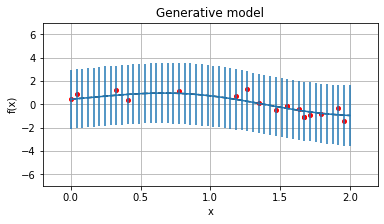

cycling 20 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16]


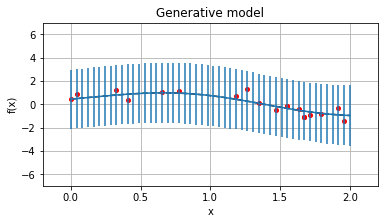

cycling 21 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39]


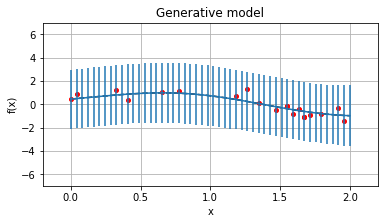

cycling 22 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11]


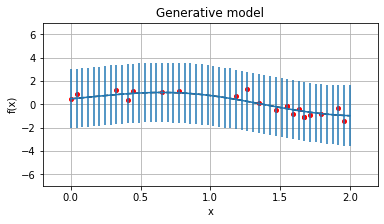

cycling 23 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45]


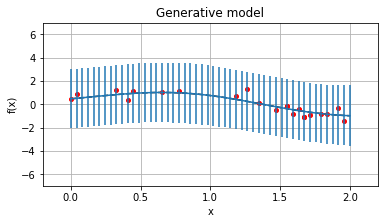

cycling 24 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43]


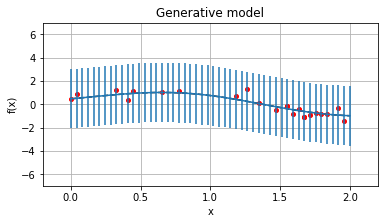

cycling 25 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3]


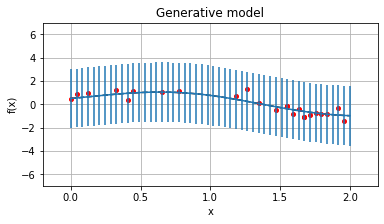

cycling 26 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14]


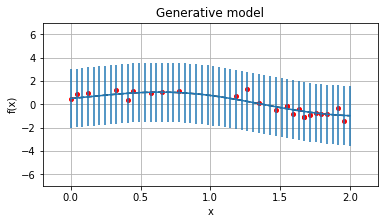

cycling 27 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38]


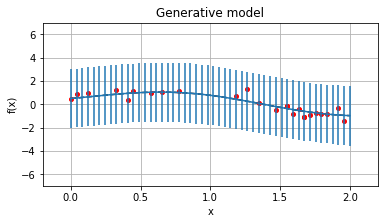

cycling 28 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37]


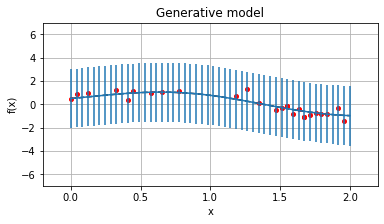

cycling 29 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22]


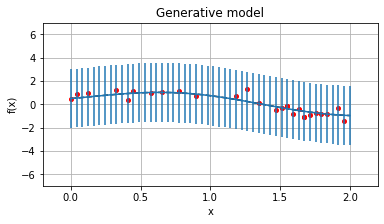

cycling 30 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12]


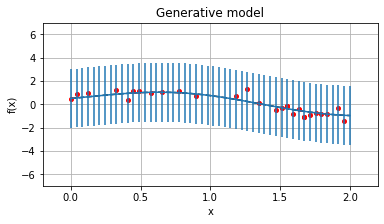

cycling 31 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44]


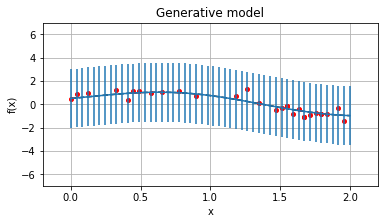

cycling 32 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10]


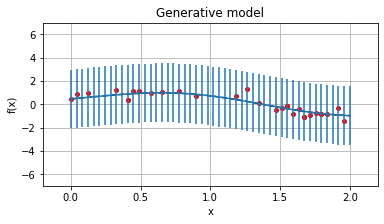

cycling 33 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41]


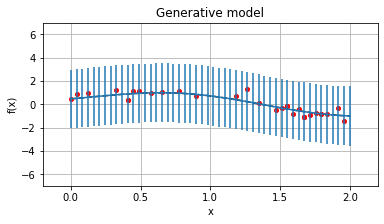

cycling 34 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38]


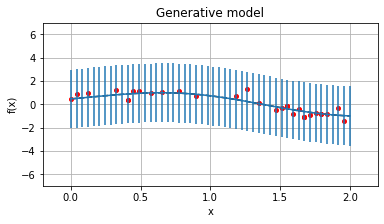

cycling 35 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38, 38]


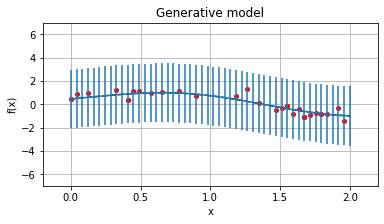

cycling 36 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38, 38, 5]


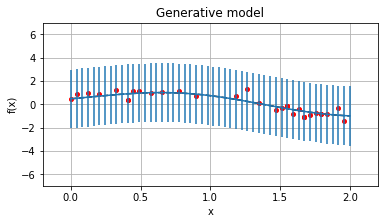

cycling 37 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38, 38, 5, 36]


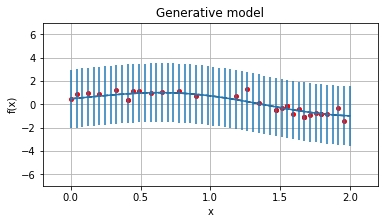

cycling 38 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38, 38, 5, 36, 12]


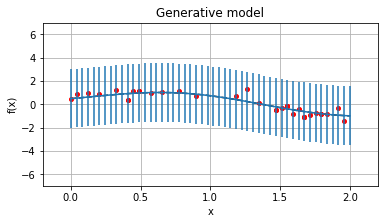

cycling 39 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38, 38, 5, 36, 12, 21]


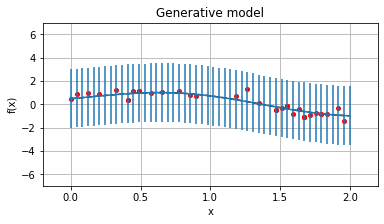

cycling 40 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38, 38, 5, 36, 12, 21, 32]


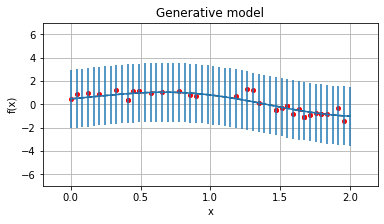

cycling 41 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38, 38, 5, 36, 12, 21, 32, 19]


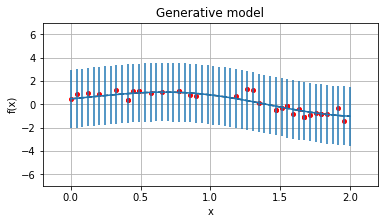

cycling 42 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38, 38, 5, 36, 12, 21, 32, 19, 13]


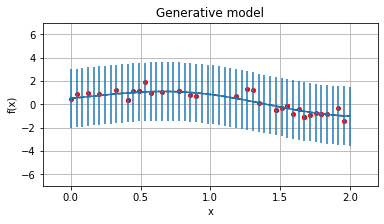

cycling 43 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38, 38, 5, 36, 12, 21, 32, 19, 13, 20]


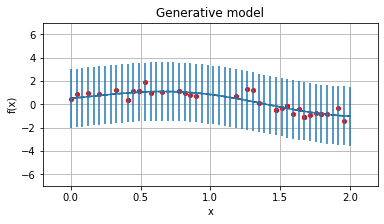

cycling 44 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38, 38, 5, 36, 12, 21, 32, 19, 13, 20, 27]


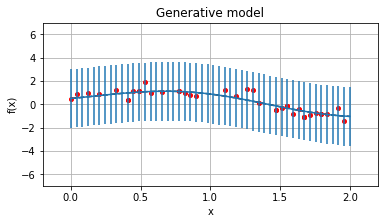

cycling 45 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38, 38, 5, 36, 12, 21, 32, 19, 13, 20, 27, 6]


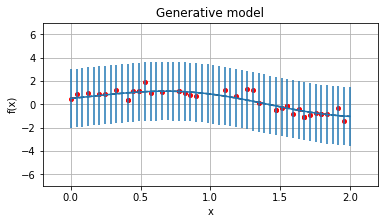

cycling 46 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38, 38, 5, 36, 12, 21, 32, 19, 13, 20, 27, 6, 15]


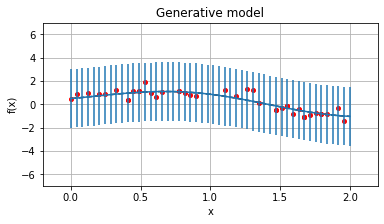

cycling 47 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38, 38, 5, 36, 12, 21, 32, 19, 13, 20, 27, 6, 15, 25]


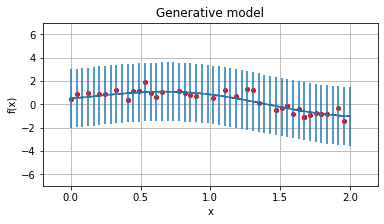

cycling 48 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38, 38, 5, 36, 12, 21, 32, 19, 13, 20, 27, 6, 15, 25, 24]


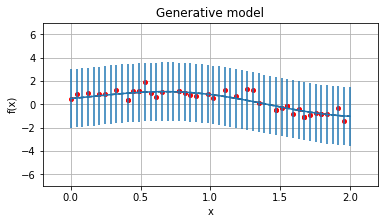

cycling 49 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38, 38, 5, 36, 12, 21, 32, 19, 13, 20, 27, 6, 15, 25, 24, 48]


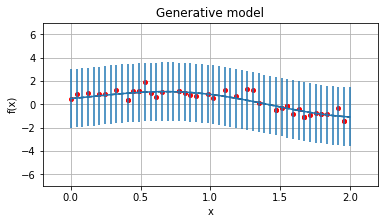

cycling 50 times
[8, 38, 41, 36, 10, 33, 41, 47, 1, 38, 41, 44, 40, 0, 19, 48, 31, 42, 29, 16, 39, 11, 45, 43, 3, 14, 38, 37, 22, 12, 44, 10, 41, 38, 38, 5, 36, 12, 21, 32, 19, 13, 20, 27, 6, 15, 25, 24, 48, 23]


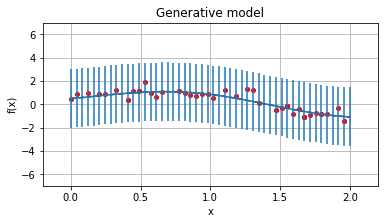

In [13]:
input_x=list()
input_y=list()
indl=list()
M=5
S=0.5
alpha=0.5
beta=0.4
[x,y,x_tr,y_tr]=data_generater(f,0,2,50)

for i in range(0,50):
    ind=rm.randint(0,49)
    indl.append(ind)
    input_x.append(x[ind])
    input_y.append(y[ind])
    
    w = Full_fit(input_x,input_y,M,S,alpha,beta)
    
    N=len(input_x)
    X=np.zeros([N,M])
    for n in range(0,N):
        mu=0
        for m in range(0,M):
            mu+=S
            X[n,m]=gaussian(input_x[n],mu,S)
    if i == 0:        
        Sn=linalg.inv(alpha*np.eye(M)+beta*np.dot(X.T,X))
    else:
        iSn=linalg.inv(Sn)+beta*np.dot(X.T,X)
        Sn=linalg.inv(iSn)
        
    x_tr=np.linspace(0,2,50)
    [_,y_tr]=Full_plot(x_tr,w)
    var=np.zeros(50)
    
    for n in range(0,50):
        var[n]=variance(x_tr[n],Sn,S,M)
        
    print("cycling %d times"%(i+1))
    print(indl)
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    ax.plot(x_tr, y_tr, '--k')
    ax.plot(input_x, input_y, 'or', ms=4)
    plt.errorbar(x_tr,y_tr,yerr=var)
    ax.set_xlim(-0.2, 2.2)
    ax.set_ylim(-7, 7)
    ax.set_title('Generative model')
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
    plt.show()
    
    
    

### 8.Explain why the predictive distribution is better than the original form of the full Bayesian inference.

The Sn is based on Sn-1. When new data is added, the Sn is changed and includes the information of the new data. As the data accumulates, the algorithm konws more and more information about the true distribution. It gradually estimates the true line, so it performs better and better. At last, predictive distribution is better than the original one.   

### 9.Discuss the differences between p(t_new|t) and p(w|t).

P(t_new|t) is the probability distribution of the test data given training data. It implies how sure we are about the predicted value.
P(w|t) is the probability distribution of the regression line given training data. It implies how sure we are about the predicted regression line.